In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install moviepy
!pip install opencv-python

In [ ]:
root_folder = "/content/drive/MyDrive/dltest/doantotnghiep/data"

In [ ]:
import os
from moviepy.editor import VideoFileClip
import matplotlib.pyplot as plt
from collections import defaultdict
import cv2

  if event.key is 'enter':



#Vẽ biểu đồ số lượng video folder

In [ ]:
def count_videos_in_folders(main_folder):
    """Đếm số lượng video trong từng thư mục hành động."""
    video_counts = {}

    for action in os.listdir(main_folder):
        action_folder = os.path.join(main_folder, action)

        if os.path.isdir(action_folder):
            video_count = sum(1 for video_file in os.listdir(action_folder)
                              if os.path.isfile(os.path.join(action_folder, video_file))
                              and video_file.endswith(('.mp4', '.avi', '.mov')))
            video_counts[action] = video_count

    return video_counts


In [ ]:
def plot_video_counts(video_counts):
    """Vẽ biểu đồ số lượng video trong từng thư mục hành động."""
    actions = list(video_counts.keys())
    counts = list(video_counts.values())

    plt.figure(figsize=(10, 6))
    plt.bar(actions, counts, color='coral')
    plt.xlabel('Hành động')
    plt.ylabel('Số Video Action')
    plt.title('Số Video Action trong thư mục')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


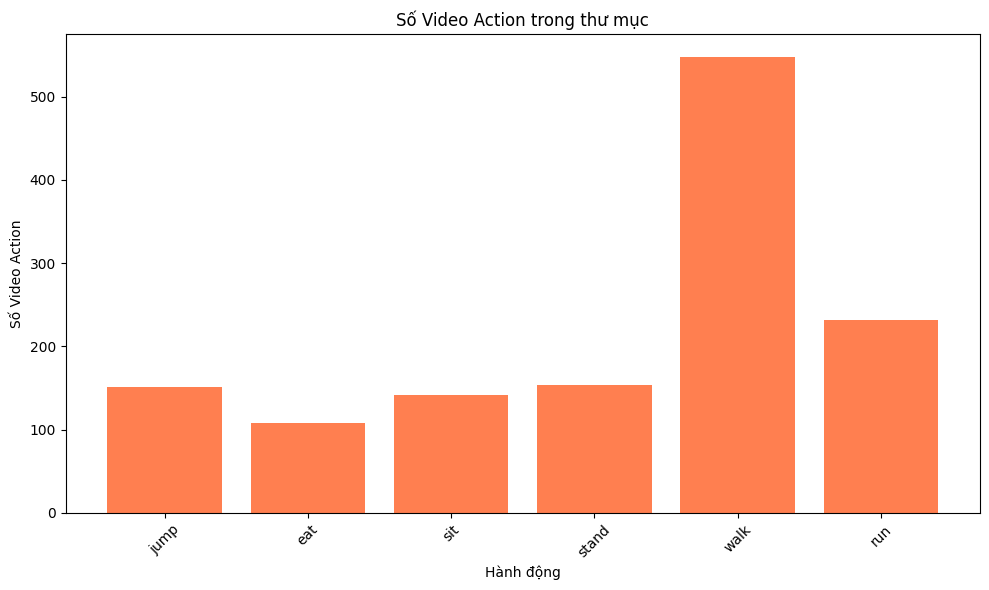

In [ ]:
video_counts = count_videos_in_folders(root_folder)
plot_video_counts(video_counts)

#Vẽ biểu đồ tổng thời gian video


In [ ]:
def check_video_fps_frames_duration(video_path):
    """Kiểm tra FPS, số lượng frame và tổng thời gian của một video."""
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        return None, None, None

    fps = cap.get(cv2.CAP_PROP_FPS)
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    duration = frame_count / fps if fps > 0 else None
    cap.release()

    return fps, frame_count, duration


In [ ]:
def collect_video_data(main_folder):
    """Thu thập FPS, số lượng frame, và tổng thời gian cho từng video trong các thư mục hành động."""
    video_data = {}

    for action in os.listdir(main_folder):
        action_folder = os.path.join(main_folder, action)

        if os.path.isdir(action_folder):
            action_durations = []

            for video_file in os.listdir(action_folder):
                video_path = os.path.join(action_folder, video_file)

                if os.path.isfile(video_path) and video_file.endswith(('.mp4', '.avi', '.mov')):
                    _, _, duration = check_video_fps_frames_duration(video_path)
                    if duration is not None:
                        action_durations.append(duration)

            # Lưu danh sách thời gian của các video trong từng hành động
            video_data[action] = action_durations

    return video_data

In [ ]:
def plot_video_durations(video_data):
    """Vẽ biểu đồ thời gian của các video cho từng loại hành động."""
    actions = list(video_data.keys())
    durations = [sum(video_data[action]) for action in actions]  # Tổng thời gian của các video cho mỗi hành động

    plt.figure(figsize=(10, 6))
    plt.bar(actions, durations, color='skyblue')
    plt.xlabel('Hành động')
    plt.ylabel('Tổng thời gian')
    plt.title('Tổng thời gian trên hành động')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

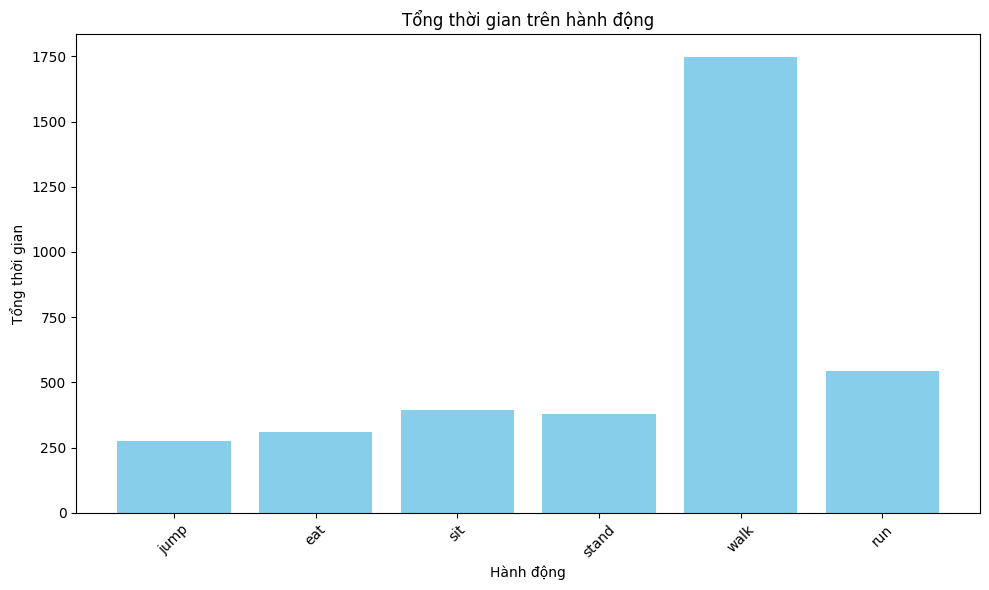

In [ ]:
video_data = collect_video_data(root_folder)
plot_video_durations(video_data)

In [ ]:
def calculate_average_durations(video_data):
    """Tính thời gian trung bình của các video trong từng hành động."""
    average_durations = {}

    for action, durations in video_data.items():
        if durations:  # Kiểm tra nếu có ít nhất một video
            average_durations[action] = sum(durations) / len(durations)
        else:
            average_durations[action] = 0  # Không có video nào trong hành động này

    return average_durations

In [ ]:
average_durations = calculate_average_durations(video_data)
print("\nThời gian trung bình của các video trong từng hành động:")
for action, avg_duration in average_durations.items():
    print(f"{action}: {avg_duration:.2f} giây")



Thời gian trung bình của các video trong từng hành động:
jump: 1.82 giây
eat: 2.88 giây
sit: 2.76 giây
stand: 2.47 giây
walk: 3.19 giây
run: 2.34 giây


#Xuất ra biểu đồ của các Frame

Video Duration: 3.50 seconds, Original FPS: 30, Total Frames: 105
Saved 9 frames to /content/drive/MyDrive/dltest/doantotnghiep/outputframe/frames


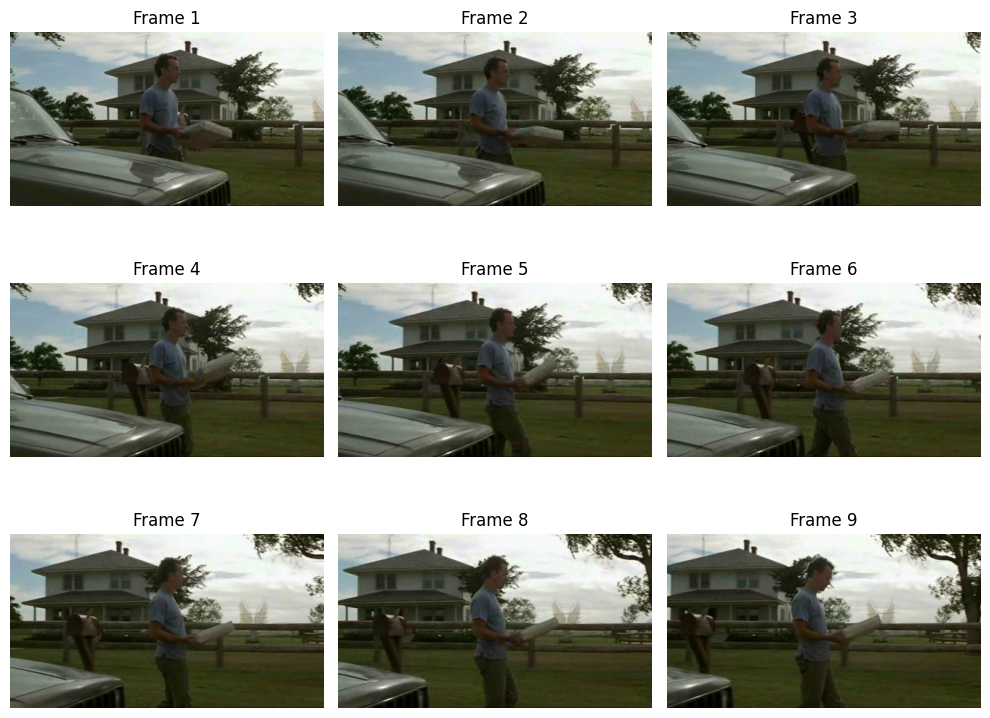

In [ ]:
import cv2
import os
import matplotlib.pyplot as plt

def extract_and_plot_frames(video_path, output_folder, fps=1, grid_size=(3, 3)):
    """
    Extract frames from a video, save them as images, and plot them in a grid.

    Parameters:
        video_path (str): Path to the video file.
        output_folder (str): Folder to save the extracted frames.
        fps (int): Number of frames to extract per second. Default is 1 frame per second.
        grid_size (tuple): Grid size for plotting (rows, columns).
    """
    # Kiểm tra và tạo thư mục output nếu chưa tồn tại
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Mở video
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        print(f"Cannot open video file: {video_path}")
        return

    # Lấy thông tin video
    original_fps = int(cap.get(cv2.CAP_PROP_FPS))
    frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    duration = frame_count / original_fps

    print(f"Video Duration: {duration:.2f} seconds, Original FPS: {original_fps}, Total Frames: {frame_count}")

    frame_interval = max(1, original_fps // fps)
    frame_index = 0
    saved_frames = []

    # Trích xuất frame
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break

        if frame_index % frame_interval == 0:
            # Lưu frame
            frame_filename = os.path.join(output_folder, f"frame_{frame_index:06d}.jpg")
            cv2.imwrite(frame_filename, frame)
            saved_frames.append(frame)

        if len(saved_frames) >= grid_size[0] * grid_size[1]:
            break  # Chỉ lưu số lượng frame đủ cho grid

        frame_index += 1

    cap.release()
    print(f"Saved {len(saved_frames)} frames to {output_folder}")

    # Hiển thị các frame trong lưới
    plt.figure(figsize=(10, 8))
    for i, frame in enumerate(saved_frames):
        plt.subplot(grid_size[0], grid_size[1], i + 1)
        # Chuyển đổi BGR sang RGB để hiển thị đúng màu
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        plt.imshow(frame_rgb)
        plt.axis('off')
        plt.title(f"Frame {i+1}")

    plt.tight_layout()
    plt.show()



# Ví dụ sử dụng
video_path = "/content/drive/MyDrive/dltest/doantotnghiep/data/walk/training_110.avi"
output_folder = "/content/drive/MyDrive/dltest/doantotnghiep/outputframe/frames"
fps = 5  # Lấy 2 frame/giây
grid_size = (3, 3)  # Hiển thị 3x3 hình ảnh
extract_and_plot_frames(video_path, output_folder, fps, grid_size)


Video Duration: 2.43 seconds, Original FPS: 30, Total Frames: 73
Saved 9 frames to /content/drive/MyDrive/dltest/doantotnghiep/outputframe/frames2


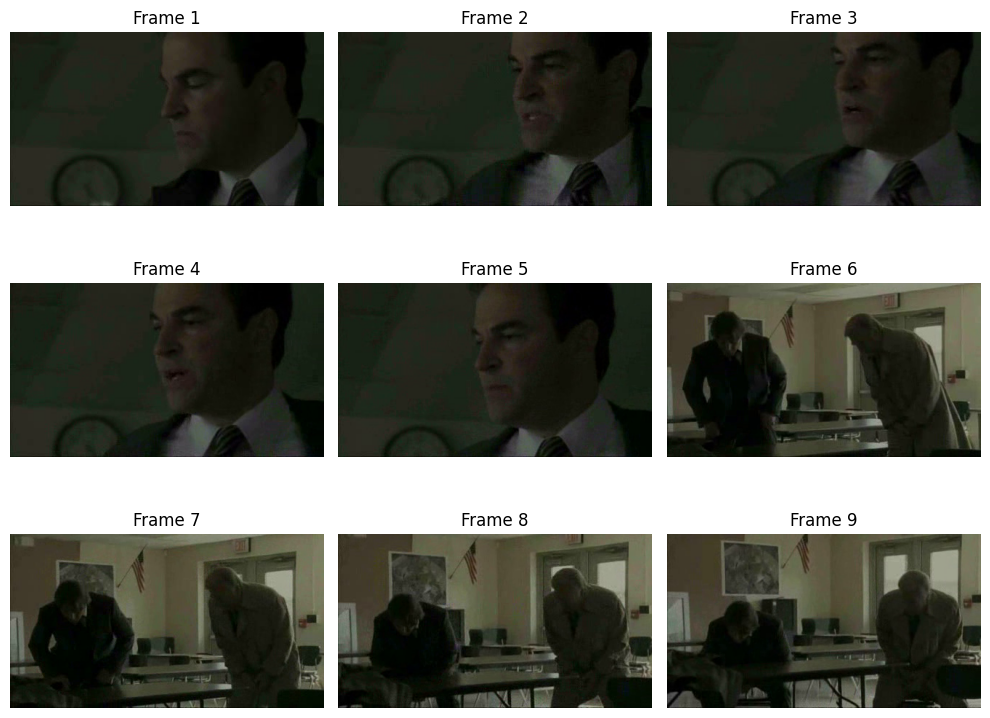

In [ ]:
video_path = "/content/drive/MyDrive/dltest/doantotnghiep/data/sit/training_12.avi"
output_folder = "/content/drive/MyDrive/dltest/doantotnghiep/outputframe/frames2"
fps = 5  # Lấy 2 frame/giây
grid_size = (3, 3)  # Hiển thị 3x3 hình ảnh
extract_and_plot_frames(video_path, output_folder, fps, grid_size)

Video Duration: 1.77 seconds, Original FPS: 30, Total Frames: 53
Saved 9 frames to /content/drive/MyDrive/dltest/doantotnghiep/outputframe/frames3


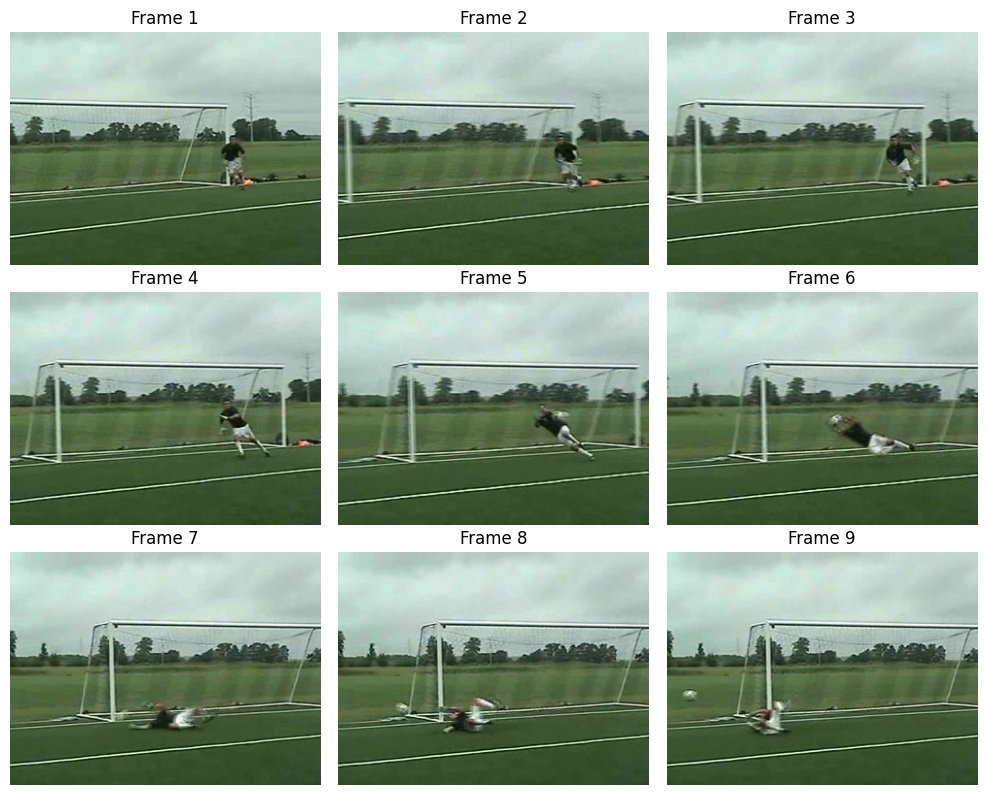

In [ ]:
video_path = "/content/drive/MyDrive/dltest/doantotnghiep/data/jump/testing_23.avi"
output_folder = "/content/drive/MyDrive/dltest/doantotnghiep/outputframe/frames3"
fps = 5  # Lấy 2 frame/giây
grid_size = (3, 3)  # Hiển thị 3x3 hình ảnh
extract_and_plot_frames(video_path, output_folder, fps, grid_size)

#Vẽ biểu đồ kiểm tra số lượng video có cùng FPS

In [ ]:
from collections import Counter

def check_video_fps(video_path):
    """Kiểm tra FPS của một video."""
    cap = cv2.VideoCapture(video_path)
    if not cap.isOpened():
        return None

    fps = cap.get(cv2.CAP_PROP_FPS)
    cap.release()

    return fps

In [ ]:
def collect_fps_data(main_folder):
    """Thu thập dữ liệu FPS cho từng video trong các thư mục hành động."""
    fps_list = []

    for action in os.listdir(main_folder):
        action_folder = os.path.join(main_folder, action)

        if os.path.isdir(action_folder):
            for video_file in os.listdir(action_folder):
                video_path = os.path.join(action_folder, video_file)

                if os.path.isfile(video_path) and video_file.endswith(('.mp4', '.avi', '.mov')):
                    fps = check_video_fps(video_path)
                    if fps is not None:
                        fps_list.append(round(fps))  # Làm tròn FPS để dễ đếm

    # Đếm số lượng video có cùng chỉ số FPS
    fps_counts = Counter(fps_list)
    return fps_counts

In [ ]:
def plot_fps_distribution(fps_counts):
    """Vẽ biểu đồ số lượng video cho từng chỉ số FPS."""
    fps_values = list(fps_counts.keys())
    video_counts = list(fps_counts.values())

    plt.figure(figsize=(10, 6))
    plt.bar(fps_values, video_counts, color='lightgreen')
    plt.xlabel('FPS')
    plt.ylabel('Number of Videos')
    plt.title('Distribution of Video FPS')
    plt.xticks(fps_values)  # Đảm bảo chỉ số FPS được hiển thị
    plt.tight_layout()
    plt.show()

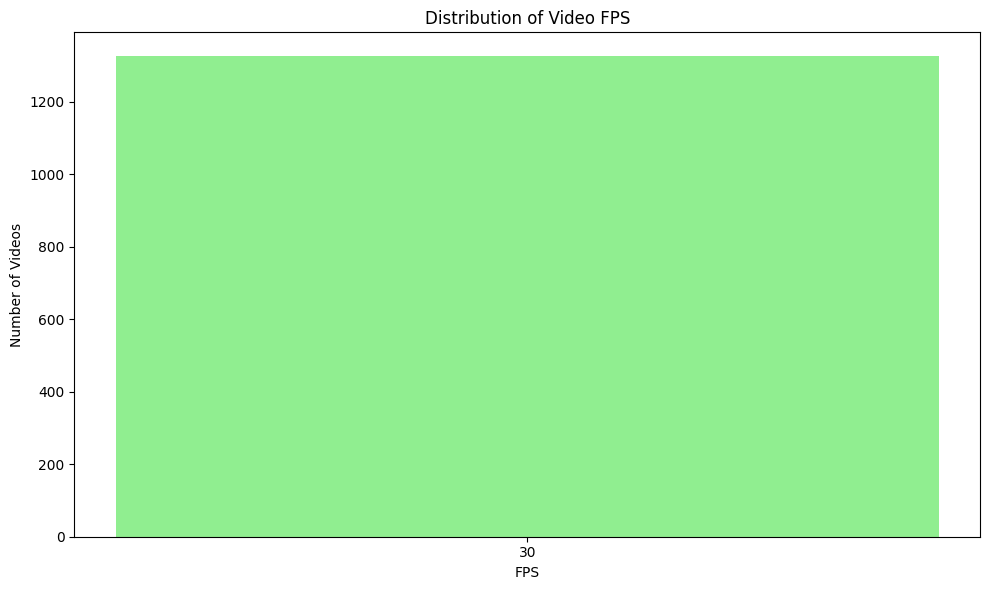

In [ ]:
fps_counts = collect_fps_data(root_folder)
plot_fps_distribution(fps_counts)

In [ ]:
import os
import cv2

def process_videos(input_folder, output_folder):
    """
    Process videos by extracting only the last 1.5 seconds of each video.

    Args:
        input_folder (str): Path to the folder containing action subfolders with videos.
        output_folder (str): Path to save the processed videos.
    """
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    # Iterate through action folders
    for action_folder in os.listdir(input_folder):
        action_path = os.path.join(input_folder, action_folder)
        if not os.path.isdir(action_path):
            continue

        output_action_path = os.path.join(output_folder, action_folder)
        os.makedirs(output_action_path, exist_ok=True)

        # Iterate through videos in the action folder
        for video_file in os.listdir(action_path):
            video_path = os.path.join(action_path, video_file)
            if not video_file.lower().endswith(('.mp4', '.avi', '.mov', '.mkv')):
                continue

            # Read video
            cap = cv2.VideoCapture(video_path)
            fps = int(cap.get(cv2.CAP_PROP_FPS))
            total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

            # Ensure at least 1.5 seconds of footage
            if fps * 1.5 > total_frames:
                print(f"Skipping {video_file} (less than 1.5 seconds) ")
                cap.release()
                continue

            # Calculate last 1.5 seconds
            frames_to_extract = int(fps * 1.5)  # Number of frames in 1.5 seconds
            last_start_frame = total_frames - frames_to_extract

            # Ensure valid frame range
            last_start_frame = max(0, last_start_frame)

            # Define output video writer
            output_video_path = os.path.join(output_action_path, video_file)
            fourcc = cv2.VideoWriter_fourcc(*'mp4v')
            output_size = (
                int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),
                int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
            )
            out = cv2.VideoWriter(output_video_path, fourcc, fps, output_size)

            # Extract and save last 1.5 seconds
            current_frame = 0
            while cap.isOpened():
                ret, frame = cap.read()
                if not ret:
                    break

                if current_frame >= last_start_frame:
                    out.write(frame)

                current_frame += 1

            cap.release()
            out.release()
            print(f"Processed {video_file} -> {output_video_path}")

    print("Processing completed.")


In [ ]:
# Đường dẫn input và output
output_folder = "/content/drive/MyDrive/dltest/doantotnghiep/videoprocessing"  # Thư mục lưu kết quả

process_videos(root_folder, output_folder)


Processed testing_19.avi -> /content/drive/MyDrive/dltest/doantotnghiep/videoprocessing/jump/testing_19.avi
Skipping testing_6.avi (less than 1.5 seconds) 
Processed training_1.avi -> /content/drive/MyDrive/dltest/doantotnghiep/videoprocessing/jump/training_1.avi
Processed testing_34.avi -> /content/drive/MyDrive/dltest/doantotnghiep/videoprocessing/jump/testing_34.avi
Processed training_100.avi -> /content/drive/MyDrive/dltest/doantotnghiep/videoprocessing/jump/training_100.avi
Processed testing_8.avi -> /content/drive/MyDrive/dltest/doantotnghiep/videoprocessing/jump/testing_8.avi
Skipping training_111.avi (less than 1.5 seconds) 
Processed testing_25.avi -> /content/drive/MyDrive/dltest/doantotnghiep/videoprocessing/jump/testing_25.avi
Processed training_102.avi -> /content/drive/MyDrive/dltest/doantotnghiep/videoprocessing/jump/training_102.avi
Skipping testing_15.avi (less than 1.5 seconds) 
Processed training_110.avi -> /content/drive/MyDrive/dltest/doantotnghiep/videoprocessing/

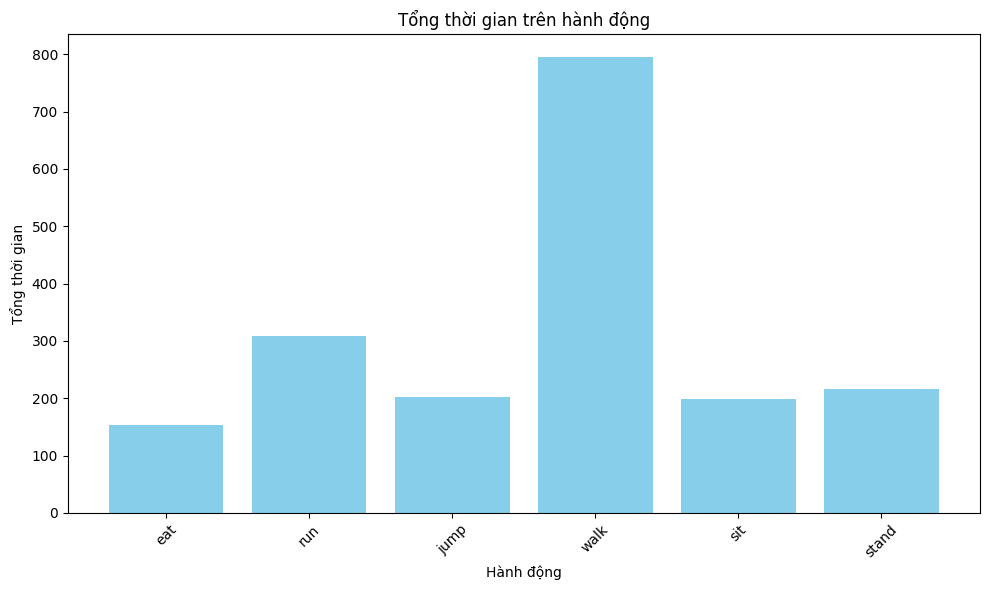

In [ ]:
video_data_processing = collect_video_data(output_folder)
plot_video_durations(video_data_processing)